In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
from __future__ import unicode_literals

import os
import sys

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set()
sns.set_style("whitegrid")
sns.set_context("poster")

mpl.rcParams['figure.figsize'] = [8.0*2, 6.0*2]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 30
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'


# Introduction

On fait des plots sur les runs

In [3]:
from problem.workflow import pprint

# Data

In [4]:
from problem.mnist import load_data

In [5]:
X, y = load_data()

# Load models

In [6]:
from problem.mnist import get_save_directory
from problem.mnist import preprocessing
from problem.mnist import skew
from problem.mnist import tangent
from problem.mnist import get_cv_iter

# from main import get_data_shape

In [7]:
def load_models(model_class, *args, **kwargs):
    models = []
    cv_iter = get_cv_iter(X, y)
    n_cv = len(cv_iter)
    pprint('Loading', n_cv, model_class.__name__)
    for i in range(n_cv):
        model = model_class(*args, **kwargs)
        save_directory = get_save_directory()
        model_name = '{}-{}'.format(model.get_name(), i)
        path = os.path.join(save_directory, model_name)
        model.load(path)
        models.append(model)
    return models

In [8]:
from models.mnist import NeuralNetModel
from models.mnist import AugmentedNeuralNetModel
from models.mnist import TangentPropModel
from models.mnist import AugmentedTangentPropModel
from models.mnist import PivotModel


# Test submission

In [9]:
from problem.mnist import test_submission


In [10]:
def get_mean_std(df_list):
    z = df_list[0]['z']
    acc = np.concatenate([df['error'].values.reshape(-1, 1) for df in df_list], axis=1)
    mean_acc = np.mean(acc, axis=1)
    std_acc = np.std(acc, axis=1)
    return mean_acc, std_acc

In [11]:
# z_list = list(range(-50, 51, 10)) + list(range(-5, 6, 1))
# z_list = sorted(z_list)
z_list = np.linspace(-10, 10, num=21)
print(z_list)

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


In [12]:
NN_models = load_models(NeuralNetModel, n_steps=10000, batch_size=128, cuda=True)
df_list = test_submission(NN_models, X, y, z_list=z_list)
NN_mean_acc, NN_std_acc = get_mean_std(df_list)


2018-02-23 15:50:20 Loading 12 NeuralNetModel
2018-02-23 15:50:26 testing model 1/12
2018-02-23 15:51:03 testing model 2/12
2018-02-23 15:51:38 testing model 3/12
2018-02-23 15:52:13 testing model 4/12
2018-02-23 15:52:48 testing model 5/12
2018-02-23 15:53:24 testing model 6/12
2018-02-23 15:53:59 testing model 7/12
2018-02-23 15:54:33 testing model 8/12
2018-02-23 15:55:06 testing model 9/12
2018-02-23 15:55:38 testing model 10/12
2018-02-23 15:56:12 testing model 11/12
2018-02-23 15:56:45 testing model 12/12
2018-02-23 15:57:17 Done.


In [15]:
ANN_5_models = load_models(AugmentedNeuralNetModel, skewing_function=skew, n_augment=5,
                         batch_size=128, n_steps=10000, width=5., cuda=True)
df_list = test_submission(ANN_5_models, X, y, z_list=z_list)
ANN_5_mean_acc, ANN_5_std_acc = get_mean_std(df_list)


2018-02-23 15:58:35 Loading 12 AugmentedNeuralNetModel
2018-02-23 15:58:35 testing model 1/12
2018-02-23 15:59:08 testing model 2/12
2018-02-23 15:59:41 testing model 3/12
2018-02-23 16:00:13 testing model 4/12
2018-02-23 16:00:46 testing model 5/12
2018-02-23 16:01:18 testing model 6/12
2018-02-23 16:01:51 testing model 7/12
2018-02-23 16:02:23 testing model 8/12
2018-02-23 16:02:56 testing model 9/12
2018-02-23 16:03:29 testing model 10/12
2018-02-23 16:04:03 testing model 11/12
2018-02-23 16:04:37 testing model 12/12
2018-02-23 16:05:10 Done.


In [17]:
ANN_10_models = load_models(AugmentedNeuralNetModel, skewing_function=skew, n_augment=5,
                         batch_size=128, n_steps=10000, width=10., cuda=True)
df_list = test_submission(ANN_10_models, X, y, z_list=z_list)
ANN_10_mean_acc, ANN_10_std_acc = get_mean_std(df_list)


2018-02-23 16:05:16 Loading 12 AugmentedNeuralNetModel
2018-02-23 16:05:16 testing model 1/12
2018-02-23 16:05:50 testing model 2/12
2018-02-23 16:06:22 testing model 3/12
2018-02-23 16:06:55 testing model 4/12
2018-02-23 16:07:28 testing model 5/12
2018-02-23 16:08:01 testing model 6/12
2018-02-23 16:08:34 testing model 7/12
2018-02-23 16:09:07 testing model 8/12
2018-02-23 16:09:40 testing model 9/12
2018-02-23 16:10:13 testing model 10/12
2018-02-23 16:10:47 testing model 11/12
2018-02-23 16:11:20 testing model 12/12
2018-02-23 16:11:55 Done.


In [18]:
ANN_15_models = load_models(AugmentedNeuralNetModel, skewing_function=skew, n_augment=5,
                         batch_size=128, n_steps=10000, width=15., cuda=True)
df_list = test_submission(ANN_15_models, X, y, z_list=z_list)
ANN_15_mean_acc, ANN_15_std_acc = get_mean_std(df_list)


2018-02-23 16:11:55 Loading 12 AugmentedNeuralNetModel
2018-02-23 16:11:55 testing model 1/12
2018-02-23 16:12:29 testing model 2/12
2018-02-23 16:13:04 testing model 3/12
2018-02-23 16:13:38 testing model 4/12
2018-02-23 16:14:12 testing model 5/12
2018-02-23 16:14:48 testing model 6/12
2018-02-23 16:15:22 testing model 7/12
2018-02-23 16:15:55 testing model 8/12
2018-02-23 16:16:28 testing model 9/12
2018-02-23 16:17:00 testing model 10/12
2018-02-23 16:17:32 testing model 11/12
2018-02-23 16:18:06 testing model 12/12
2018-02-23 16:18:41 Done.


# Plot


- What about confusion matrices ???


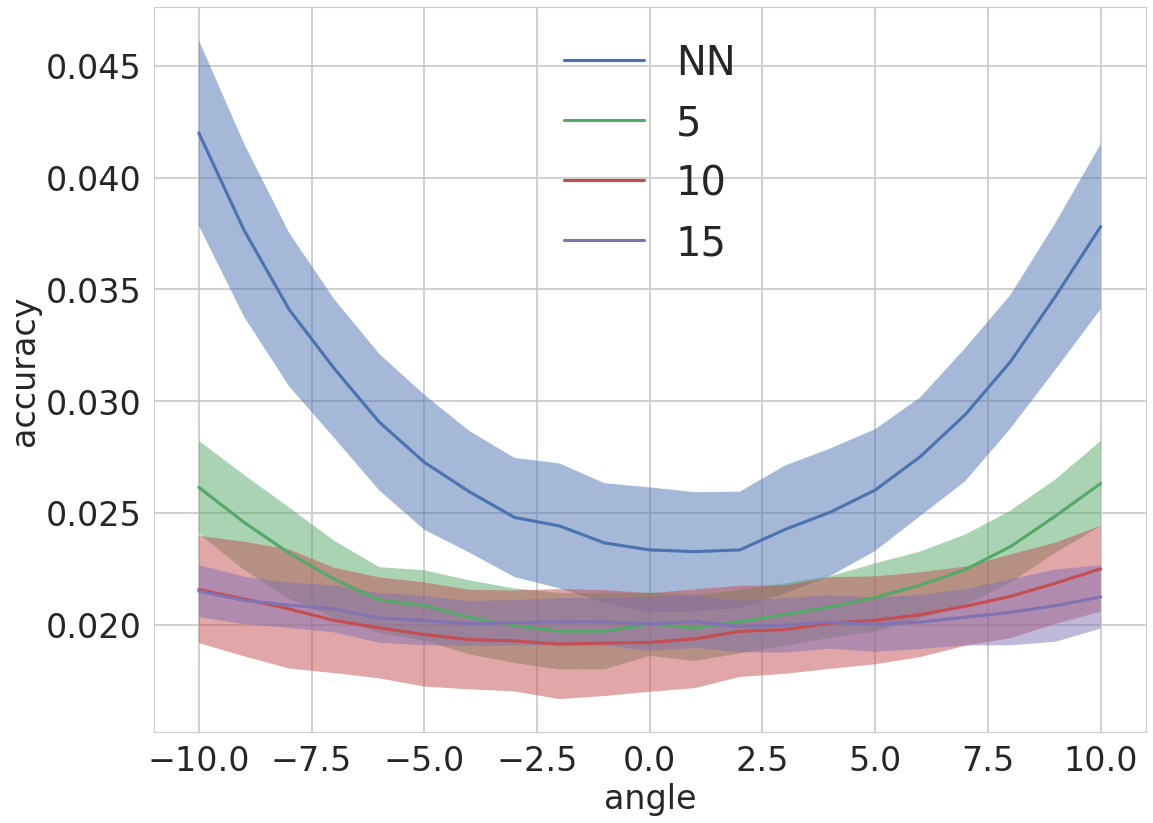

In [19]:
z = z_list

# plt.figure(figsize=(20,10))

plt.plot(z, NN_mean_acc, label='NN')
plt.fill_between(z, NN_mean_acc+NN_std_acc, NN_mean_acc-NN_std_acc, alpha=0.5)


# plt.plot(z, ANN_1_mean_acc, label='1')
# plt.fill_between(z, ANN_1_mean_acc+ANN_1_std_acc, ANN_1_mean_acc-ANN_1_std_acc, alpha=0.5)

# plt.plot(z, ANN_3_mean_acc, label='3')
# plt.fill_between(z, ANN_3_mean_acc+ANN_3_std_acc, ANN_3_mean_acc-ANN_3_std_acc, alpha=0.5)

plt.plot(z, ANN_5_mean_acc, label='5')
plt.fill_between(z, ANN_5_mean_acc+ANN_5_std_acc, ANN_5_mean_acc-ANN_5_std_acc, alpha=0.5)

plt.plot(z, ANN_10_mean_acc, label='10')
plt.fill_between(z, ANN_10_mean_acc+ANN_10_std_acc, ANN_10_mean_acc-ANN_10_std_acc, alpha=0.5)

plt.plot(z, ANN_15_mean_acc, label='15')
plt.fill_between(z, ANN_15_mean_acc+ANN_15_std_acc, ANN_15_mean_acc-ANN_15_std_acc, alpha=0.5)


plt.xlabel('angle')
plt.ylabel('accuracy')
plt.legend()
plt.show()


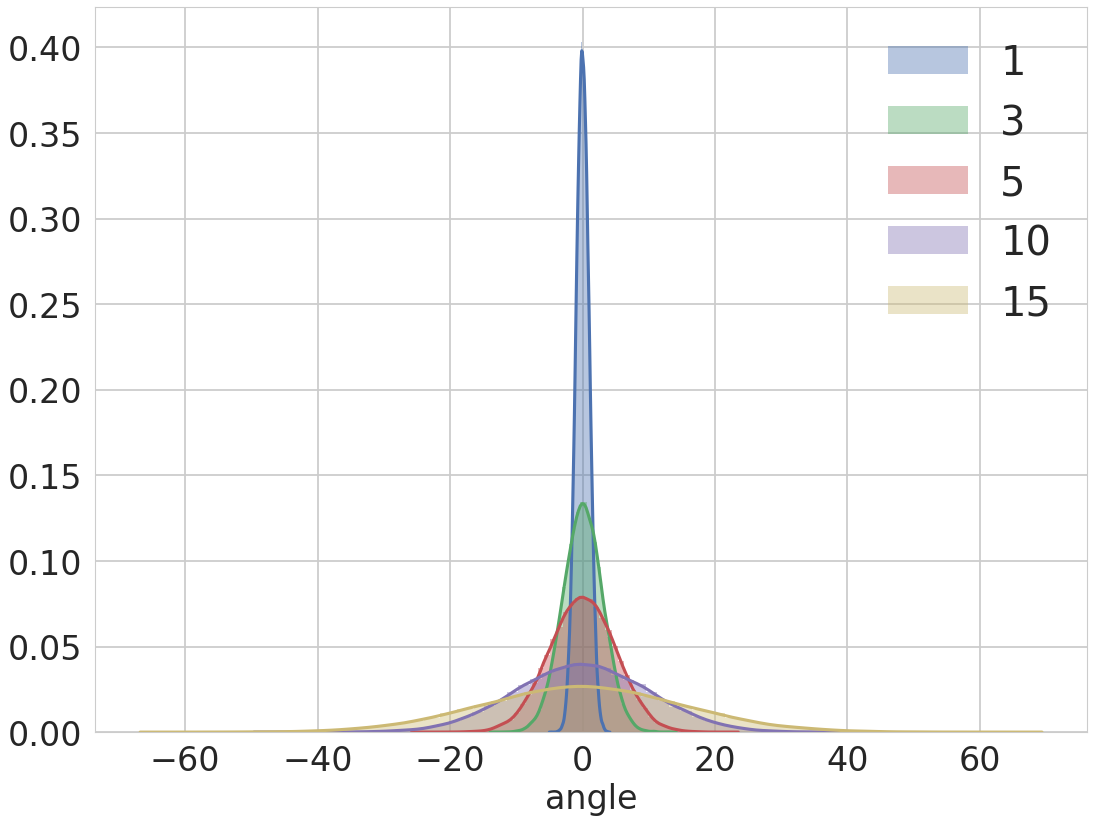

In [20]:
# plt.figure(figsize=(15,8))

zz = np.random.normal( loc=0, scale=1, size=(70000) )
sns.distplot(zz, label='1')

zz = np.random.normal( loc=0, scale=3, size=(70000) )
sns.distplot(zz, label='3')

zz = np.random.normal( loc=0, scale=5, size=(70000) )
sns.distplot(zz, label='5')

zz = np.random.normal( loc=0, scale=10, size=(70000) )
sns.distplot(zz, label='10')

zz = np.random.normal( loc=0, scale=15, size=(70000) )
sns.distplot(zz, label='15')

plt.xlabel('angle')
plt.legend()
plt.show()

## Losses

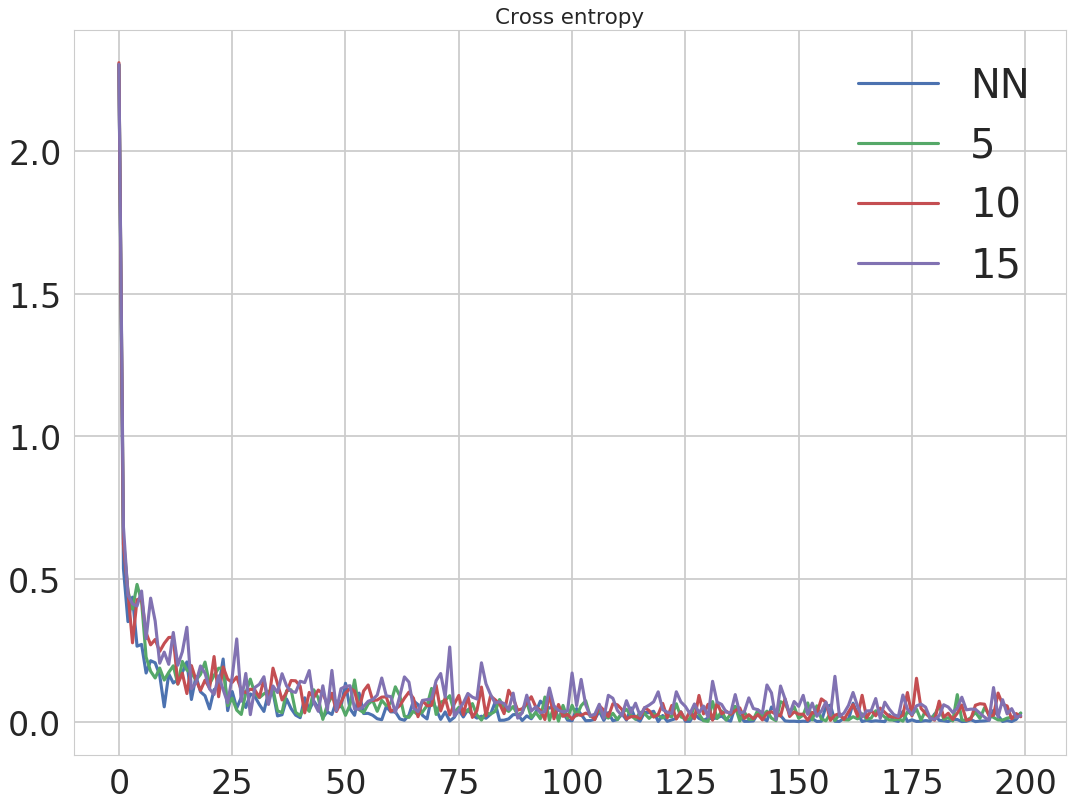

In [21]:
i = 0

plt.plot(NN_models[i].loss_hook.losses[::50], label='NN')

# plt.plot(ANN_1_models[i].loss_hook.losses[::50], label='1')
# plt.plot(ANN_3_models[i].loss_hook.losses[::50], label='3')
plt.plot(ANN_5_models[i].loss_hook.losses[::50], label='5')
plt.plot(ANN_10_models[i].loss_hook.losses[::50], label='10')
plt.plot(ANN_15_models[i].loss_hook.losses[::50], label='15')

plt.title('Cross entropy')
plt.legend()
plt.show()

# Playground

In [ ]:
# i = 0
# m = models[i]
# cv_iter = get_cv_iter(X, y)
# idx_dev, idx_valid = cv_iter[i]
# X_test = X[idx_valid]
# y_test = y[idx_valid]
# acc = accuracy_score(y_test, m.predict(X_test))

# print(acc)


In [ ]:
# XX = skew(X_test, z=80)
# y_pred = m.predict(XX)
# acc = accuracy_score(y_test, m.predict(XX))
# print(acc)

# i = np.random.randint(0, XX.shape[0])
# plt.imshow(XX[i].reshape(28,28))

# plt.title('label = {}<->truth = {}'.format(y_pred[i], y_test[i]))
# plt.show()

# plt.imshow(X_test[i].reshape(28,28))
# plt.show()


In [ ]:
# X_test.shape

In [ ]:
# from myNNDA import data_augment

In [ ]:
# XX = X[:200]
# yy = y[:200]
# XX2, yy, _ = data_augment(XX, yy, None)

In [ ]:
# i = 67
# x = XX2[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('skewed')
# plt.show()
# x = XX[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('original')
# plt.show()